In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Diwali Sales Data.csv", encoding="unicode_escape")

In [3]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
data.shape

(11251, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
data.drop(["Status", "unnamed1"], axis=1, inplace=True)

In [7]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data[["Amount", "Orders"]] = data[["Amount", "Orders"]].astype(int)

In [10]:
data.sample(6)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
10764,1004018,Parna,P00177442,M,46-50,47,0,Delhi,Central,Healthcare,Clothing & Apparel,1,1979
2653,1001381,Daksh,P00070942,F,18-25,22,0,Delhi,Central,Govt,Stationery,3,12962
7683,1004538,Webber,P00252742,F,26-35,33,1,Uttar Pradesh,Central,Textile,Games & Toys,4,6778
360,1003380,Blumstein,P00102342,F,51-55,55,0,Karnataka,Southern,Banking,Footwear & Shoes,3,20237
2914,1003614,Divyansha,P00016042,F,26-35,31,0,Delhi,Central,Healthcare,Footwear & Shoes,2,12455
3852,1001285,Laalji,P00034342,M,36-45,41,0,Karnataka,Southern,IT Sector,Sports Products,1,10995


In [11]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
data.rename(columns= {'Cust_name':'Customer_name'}, inplace=True)

In [13]:
del data["Product_ID"]

In [14]:
del data["User_ID"]

In [15]:
del data["Age"]

In [16]:
data.sample(7)

,Customer_name,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
6547,Prashant,M,46-50,1,Punjab,Northern,Healthcare,Food,1,7782
8238,Hallsten,M,26-35,1,Uttar Pradesh,Central,Aviation,Electronics & Gadgets,1,5895
7642,Shreyshi,M,36-45,1,Haryana,Northern,Banking,Clothing & Apparel,2,6866
1633,Duhita,M,26-35,0,Maharashtra,Western,Lawyer,Food,2,15916
495,Ludwig,F,36-45,1,Bihar,Eastern,Agriculture,Food,4,19617
3303,Willman,F,26-35,0,Delhi,Central,Govt,Food,2,11915
2245,Gilcrest,F,0-17,0,Andhra Pradesh,Southern,Govt,Food,3,15342


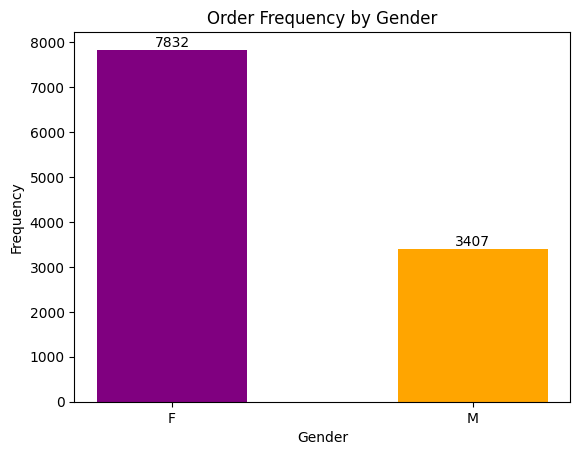

In [17]:
x = data["Gender"].value_counts().index
y = data["Gender"].value_counts().values

bars = plt.bar(x, y, width=0.5, color=["purple", "orange"])

plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Order Frequency by Gender")
plt.bar_label(bars)

plt.show()

#### Analysis: The data reveals that the majority of customers are female.

In [18]:
data["Age Group"].unique()

array(['26-35', '0-17', '18-25', '51-55', '46-50', '55+', '36-45'],
      dtype=object)

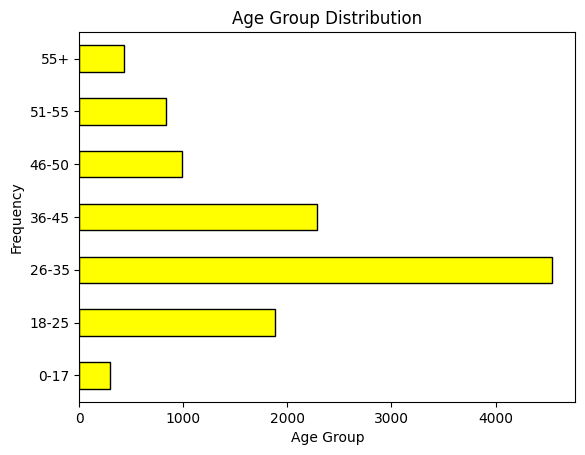

In [19]:
data['Age Group'].value_counts().sort_index().plot(kind='barh', color='yellow', edgecolor='black')

plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Frequency")

plt.show()

#### Analysis: The data indicates that the largest age group consists of individuals aged 26-35, with a notable majority being female.

In [20]:
count_sector = data["Occupation"].value_counts()
label_sector = data["Occupation"].value_counts().index

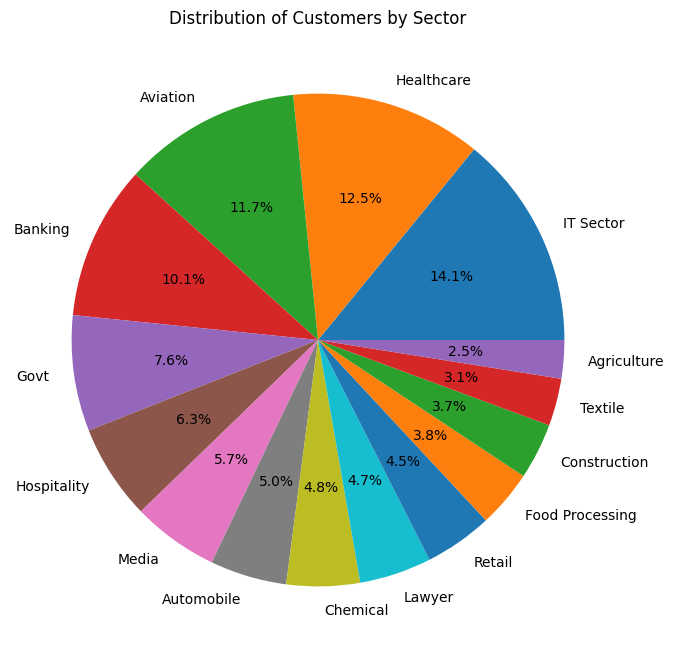

In [21]:
plt.figure(figsize=(9, 8))
plt.pie(count_sector, labels=label_sector, autopct='%1.1f%%' )
plt.title("Distribution of Customers by Sector")

plt.show()

#### Analysis: The data indicates that the majority of customers are from the Healthcare sector, followed by the IT sector, and then the Aviation sector.

In [22]:
data["Product_Category"].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

In [23]:
x = data.groupby("Product_Category")["Amount"].sum().index
y = data.groupby("Product_Category")["Amount"].sum()

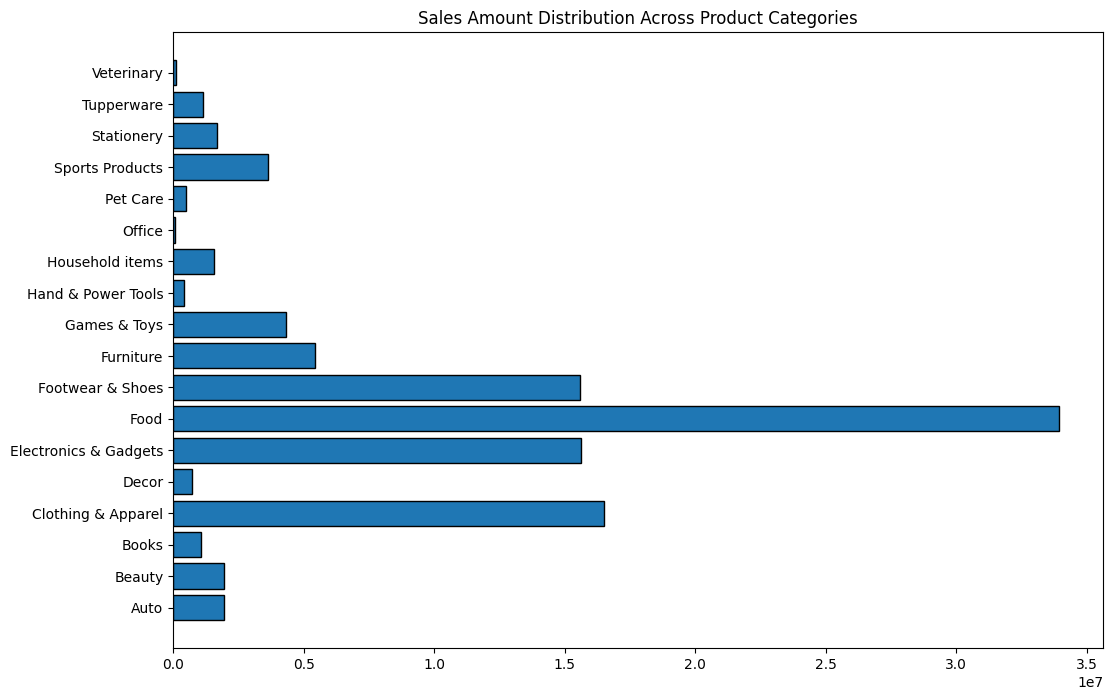

In [24]:
plt.figure(figsize=(12, 8))
plt.barh(x,y, edgecolor = "black")
plt.title("Sales Amount Distribution Across Product Categories")

plt.show()

#### Analysis: The data shows that the highest sales amount is in the Food category.

## Summary and Strategic Insights

The final analysis of diwali sales data reveals several key insights. Firstly, individuals aged 26-35 represent the largest segment, with a significant portion being female. Among the Sector-wise distribution, the majority of customers are from the Healthcare sector.  In terms of sales performance, the Food category stands out with the highest sales amount.

These insights can guide targeted marketing strategies, product offerings, and sector-specific approaches to enhance customer engagement and drive sales.